In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Classification Report:
              precision    recall  f1-score   support

    Not Spam       0.56      0.45      0.50        11
        Spam       0.45      0.56      0.50         9

    accuracy                           0.50        20
   macro avg       0.51      0.51      0.50        20
weighted avg       0.51      0.50      0.50        20


Confusion Matrix (Numerical):
[[True Negatives, False Positives]
 [False Negatives, True Positives]]
[[5 6]
 [4 5]]

Example email classification: Spam (Probability: 0.88)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


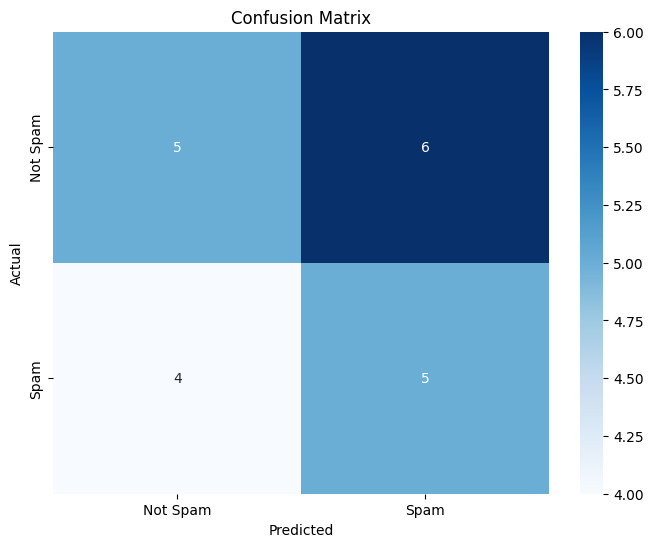

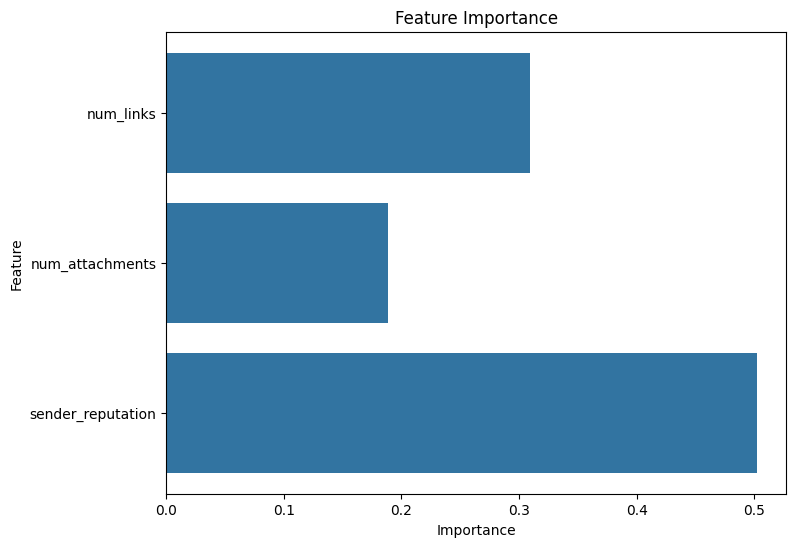

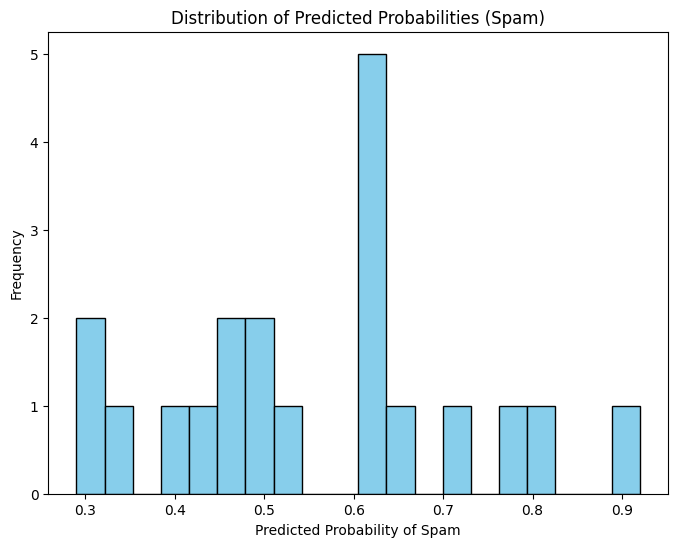

In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

# Set random seed for reproducibility
np.random.seed(42)

# Load the dataset
data = pd.read_csv("/content/drive/MyDrive/spam_emails.csv")

# Preprocess the data
def preprocess_data(df):
    # Convert 'is_spam' to binary (1 for spam, 0 for not spam)
    le = LabelEncoder()
    df['is_spam'] = le.fit_transform(df['is_spam'])  # 'yes' -> 1, 'no' -> 0

    # Check for missing or invalid values
    df = df.dropna()  # Remove rows with missing values
    df = df[(df['num_links'] >= 0) & (df['num_attachments'] >= 0)]  # Ensure non-negative counts
    df = df[(df['sender_reputation'] >= 0) & (df['sender_reputation'] <= 1)]  # Ensure reputation in [0,1]

    return df

# Prepare features and target
data = preprocess_data(data)
X = data[['num_links', 'num_attachments', 'sender_reputation']]
y = data['is_spam']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=['Not Spam', 'Spam']))

# Confusion Matrix (Numerical)
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix (Numerical):")
print("[[True Negatives, False Positives]")
print(" [False Negatives, True Positives]]")
print(cm)

# Plot 1: Confusion Matrix Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Spam', 'Spam'], yticklabels=['Not Spam', 'Spam'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.savefig('confusion_matrix.png')
plt.plot()

# Plot 2: Feature Importance
feature_names = X.columns
importances = model.feature_importances_
plt.figure(figsize=(8, 6))
sns.barplot(x=importances, y=feature_names)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.savefig('feature_importance.png')
plt.plot()

# Plot 3: Histogram of Predicted Probabilities
y_prob = model.predict_proba(X_test)[:, 1]  # Probability of being spam
plt.figure(figsize=(8, 6))
plt.hist(y_prob, bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Predicted Probabilities (Spam)')
plt.xlabel('Predicted Probability of Spam')
plt.ylabel('Frequency')
plt.savefig('predicted_probabilities.png')
plt.plot()

# Function to classify a new email
def classify_email(num_links, num_attachments, sender_reputation):
    # Ensure valid input
    if not (isinstance(num_links, (int, float)) and isinstance(num_attachments, (int, float)) and isinstance(sender_reputation, float)):
        return "Invalid input types"
    if num_links < 0 or num_attachments < 0 or sender_reputation < 0 or sender_reputation > 1:
        return "Invalid input values"

    # Predict
    features = np.array([[num_links, num_attachments, sender_reputation]])
    prediction = model.predict(features)[0]
    prob = model.predict_proba(features)[0][1]
    return f"{'Spam' if prediction == 1 else 'Not Spam'} (Probability: {prob:.2f})"

# Example usage
example_email = {'num_links': 6, 'num_attachments': 1, 'sender_reputation': 0.59}
result = classify_email(**example_email)
print(f"\nExample email classification: {result}")